# Ploting nodes and edges in adjacency matrix in python

### From nested list to network

### Deploing Random Nodes

In [45]:
import math
import random
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

### Average Shortest Path and Average Clustering Coefficient

In [46]:
# pos_df.to_csv('coordinates.csv')

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('/content/coordinates.csv')
print(df)
coordinatesOfNodes_temp = df.values.T.tolist()
print(coordinatesOfNodes_temp)

   0    1    2     3     4     5     6    7     8    9  ...   490   491   492  \
0  0  773  541   176   820   351   357  831  1866  592  ...  1155  1316  1037   
1  0  990  989  1411  1665  1379  1882   15  1103  294  ...   903   261   849   

   493   494   495   496  497   498   499  
0  247  1355  1390   625  806  1508  1155  
1  151   778   644  1347  920   802  1930  

[2 rows x 500 columns]
[[0, 0], [773, 990], [541, 989], [176, 1411], [820, 1665], [351, 1379], [357, 1882], [831, 15], [1866, 1103], [592, 294], [398, 600], [1908, 967], [1629, 1205], [1355, 1338], [1515, 494], [1105, 410], [582, 235], [1969, 1408], [386, 1112], [1661, 1802], [736, 1408], [1318, 119], [1244, 438], [917, 188], [1065, 665], [249, 414], [489, 1645], [917, 1029], [1154, 1128], [804, 904], [933, 442], [350, 1225], [893, 175], [1619, 1472], [217, 124], [424, 1814], [659, 14], [829, 226], [600, 492], [1170, 451], [397, 1788], [1414, 1451], [661, 1620], [840, 1063], [1450, 536], [1225, 660], [1732, 805], [5

Number of Nodes to be deployed: 500
Global Clustering Coefficient : 303.35253217990885
Average Clustering Coefficient : 0.6067050643598177
Average Path Length : 7.00372745490982
     0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0      0   11    6    9   13   12   15    4   15    1  ...   14   11   11   
1     11    0    8    6    3   11    8    9    6   10  ...    5    2   10   
2      6    8    0    3    9    6    9    6   10    5  ...    9    8    5   
3      9    6    3    0    7    5    7    8    8    8  ...    7    5    4   
4     13    3    9    7    0    9    5   11    3   12  ...    2    3    8   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495   15    6   10    8    3   10    3   13    1   14  ...    2    5    9   
496   15    7    9    7    4    8    1   14    2   14  ...    3    6    8   
497    5    7    2    4    9    7   10    4   11    4  ...   10    7    6   
498    2   10    5    8   12   11   14    2   14    

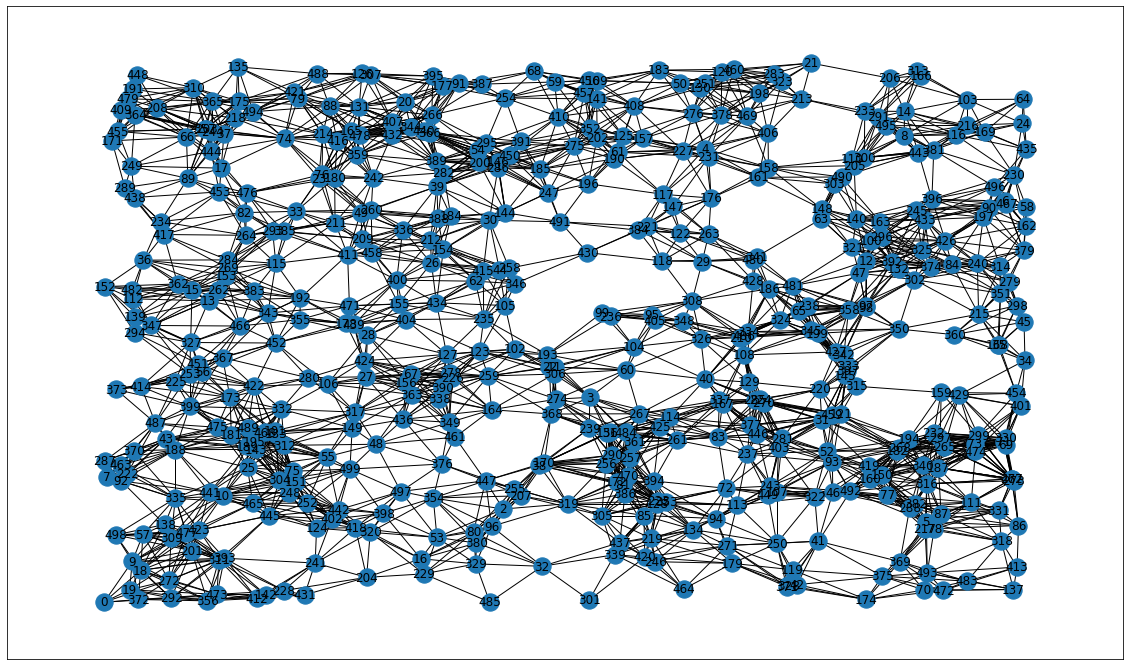

In [49]:
import math, collections, random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

def dis(p, q):
    return math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)

# Forming Network
numberOfNodes = int(input('Number of Nodes to be deployed: '))
coordinatesOfNodes = np.array([[0, 0]])
for k in range(1, numberOfNodes):
    coordinatesOfNodes = np.append(coordinatesOfNodes, [[random.random(), random.random()]], axis = 0)

# Nodes Coordinates
coordinatesOfNodes = 2000*coordinatesOfNodes
coordinatesOfNodes = coordinatesOfNodes.astype(int)
pos = {}
for l in range(len(coordinatesOfNodes)):
    pos[l] = coordinatesOfNodes[l]


# Creating Network using networkx
Wireless_network = nx.Graph()
Wireless_network.add_nodes_from(range(len(coordinatesOfNodes)))
for i in range(len(coordinatesOfNodes)):
    for j in range(len(coordinatesOfNodes)):
        if i != j:
            x = dis(coordinatesOfNodes[i], coordinatesOfNodes[j])
            if x <= 200:
                Wireless_network.add_edge(i, j)

# Creating adjacency matrix for Dijkstra's Algorithm
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()

# Drawing Network
nx.draw_networkx(Wireless_network, pos, with_labels = True)
mpl.rcParams['figure.figsize'] = (20,12)

# Finding Numbers of edges between neighbors of Current node.
def ei(neighbor, adjLis):
    res = 0
    for i in neighbor:
        for j in neighbor:
          if adjLis[i][j] == 1:
            res += 1
    return res

# Dijkstra's Algorithm
def minDist(dis, visi):
    # Findes Next U in dijkstra's algorithm
    mini = float('inf')
    for v in range(len(coordinatesOfNodes)):
        if dis[v] < mini and visi[v] == False:
            mini = dis[v]
            mini_index = v
    return mini_index

def dijkstra(surc, lis):
    dist = [float('inf')]*(len(coordinatesOfNodes))
    dist[surc] = 0
    visit = [False]*(len(coordinatesOfNodes))
    for temp in range(len(coordinatesOfNodes)):
        u = minDist(dist, visit)
        visit[u] = True
        for v in range(len(coordinatesOfNodes)):
            if ((lis[u][v] > 0) and (visit[v] == False) and (dist[v] > dist[u] + lis[u][v])):
                dist[v] = dist[u] + lis[u][v]
    return dist

# Finding Global Clustering Coefficient
clusCoeff = 0
for m in range(len(coordinatesOfNodes)):
    lis1 = collections.deque(Wireless_network.neighbors(m))
    numNeig = len(lis1)
    edgeBwNeig = ei(lis1, adjLis)
    dy = numNeig*(numNeig - 1)
    clusCoeff += (edgeBwNeig/dy)
# Prints Global Clustering Coefficient
print(f'Global Clustering Coefficient : {clusCoeff}')

# Finding Average Clustering Coefficient
Avg_clusCoeff = clusCoeff/numberOfNodes
print(f'Average Clustering Coefficient : {Avg_clusCoeff}')

# Applying Dijkstra's Algorithm for Number of Hops
pathlis = []
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()
for i in range(len(coordinatesOfNodes)):
    pathlis.append(dijkstra(i,adjLis))

# Calculating Average Path Length
total_sum = 0
for i in range(len(coordinatesOfNodes)):
  curr_sum = sum(pathlis[i])
  total_sum += curr_sum
Avg_path_len = total_sum/(499*500)
print(f'Average Path Length : {Avg_path_len}')

df = pd.DataFrame(data=pathlis)
print(df)

In [50]:
import numpy as np
import pandas as pd

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
import sklearn
from sklearn.cluster import KMeans

In [53]:
for ele in adjLis:
  print(ele)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [54]:
pos

{0: array([0, 0]),
 1: array([ 852, 1616]),
 2: array([862, 345]),
 3: array([1049,  759]),
 4: array([1298, 1680]),
 5: array([1776,  297]),
 6: array([1945, 1486]),
 7: array([  7, 465]),
 8: array([1728, 1728]),
 9: array([ 61, 151]),
 10: array([256, 393]),
 11: array([973, 871]),
 12: array([1646, 1264]),
 13: array([ 226, 1116]),
 14: array([1729, 1818]),
 15: array([ 190, 1157]),
 16: array([684, 161]),
 17: array([ 253, 1608]),
 18: array([ 79, 118]),
 19: array([55, 46]),
 20: array([ 649, 1854]),
 21: array([1527, 1997]),
 22: array([962, 871]),
 23: array([ 464, 1570]),
 24: array([1983, 1774]),
 25: array([310, 499]),
 26: array([ 707, 1256]),
 27: array([565, 835]),
 28: array([569, 989]),
 29: array([1292, 1262]),
 30: array([ 832, 1415]),
 31: array([1550,  676]),
 32: array([946, 133]),
 33: array([ 415, 1448]),
 34: array([1989,  896]),
 35: array([1933,  954]),
 36: array([  85, 1267]),
 37: array([ 259, 1736]),
 38: array([939, 507]),
 39: array([ 719, 1540]),
 40: a

### Grouping

In [55]:
pos_df = pd.DataFrame(data = pos)

In [56]:
pos_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,852,862,1049,1298,1776,1945,7,1728,61,...,1593,985,1612,1778,322,1689,1923,641,25,531
1,0,1616,345,759,1680,297,1486,465,1728,151,...,1575,1409,411,109,1817,1765,1539,410,249,493


In [57]:
res_df = pos_df.T

In [58]:
model = KMeans(n_clusters = 30)

In [59]:
model.fit(res_df)

KMeans(n_clusters=30)

In [60]:
labels = model.predict(res_df)

In [61]:
labels

array([18, 13, 21, 12,  3, 14, 11, 17, 25, 18,  2,  1, 29,  7, 25,  7, 21,
       23, 18, 18,  9,  3,  1, 19, 25,  2,  1, 20, 20, 16, 13,  5, 21, 19,
       24, 24, 23,  4, 12, 13,  5, 22,  8, 17,  1, 24, 22, 29, 20, 19,  3,
       12, 22, 21, 13,  2, 27, 18, 11, 28, 26, 28,  1,  6, 25, 15,  4, 20,
       28,  0, 14,  0, 22,  0,  9,  2, 19, 22, 14,  9, 21, 12, 23,  5, 29,
        8, 14, 14,  9, 23, 11,  9, 17, 22,  8, 26, 21, 15, 15, 26, 29,  2,
        1, 25, 26,  1, 20, 22, 26, 28,  6, 14,  7,  8, 12,  7, 25, 16, 16,
        8,  3,  5, 16,  1, 10, 28,  9, 20,  8,  5,  3,  9, 29,  2,  8,  4,
       12, 14, 18, 27, 29, 28, 10,  2, 13,  5, 13, 16,  6, 20, 22,  2,  7,
        7, 19,  1, 20, 28,  6,  0, 22,  6, 11, 29, 20,  9, 25,  5, 24, 25,
       12,  4, 12, 27, 14,  4, 16,  9,  7,  8, 19,  2,  0,  3, 13, 13, 15,
        0, 17,  2, 28,  4,  7,  1,  0,  2, 13, 11,  3, 15, 13, 18, 28,  4,
       10,  6, 25, 21,  4, 19, 26, 19, 19,  3,  9, 24, 25, 14,  4,  8,  5,
       16, 17,  8,  5, 27

In [62]:
max(labels)

29

In [63]:
label = {}
for i,ele in enumerate(labels):
  if ele in label:
    label[ele].append(i)
  else:
    label[ele] = [i]

In [64]:
res_lis = []
for i in range(30):
  res_lis.append(res_df.iloc[label[i]])

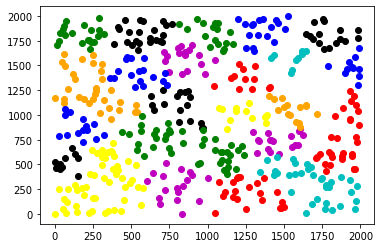

In [65]:
for i in range(0,25,8):
  plt.scatter(res_lis[i+0][0], res_lis[i+0][1], color = 'red')
  plt.scatter(res_lis[i+1][0], res_lis[i+1][1], color = 'black')
  plt.scatter(res_lis[i+2][0], res_lis[i+2][1], color = 'yellow')
  plt.scatter(res_lis[i+3][0], res_lis[i+3][1], color = 'blue')
  plt.scatter(res_lis[i+4][0], res_lis[i+4][1], color = 'green')
  if i+5 < 29:
    plt.scatter(res_lis[i+5][0], res_lis[i+5][1], color = 'm')
    plt.scatter(res_lis[i+6][0], res_lis[i+6][1], color = 'c')
    plt.scatter(res_lis[i+7][0], res_lis[i+7][1], color = 'orange')  
plt.show()

In [66]:
'''## rough
label_0 = df[label == 0]
label_1 = df[label == 1]
label_2 = df[label == 2]'''

'## rough\nlabel_0 = df[label == 0]\nlabel_1 = df[label == 1]\nlabel_2 = df[label == 2]'

In [67]:
def collabrative(c1, c2, Wireless_network, label):
    for i in label[c1]:
        for j in label[c2]:
            Wireless_network.add_edge(i, j)

In [68]:
collabrative(5, 7, Wireless_network, label)


In [69]:
collabrative(6, 16, Wireless_network, label)

In [70]:
collabrative(18, 29, Wireless_network, label)

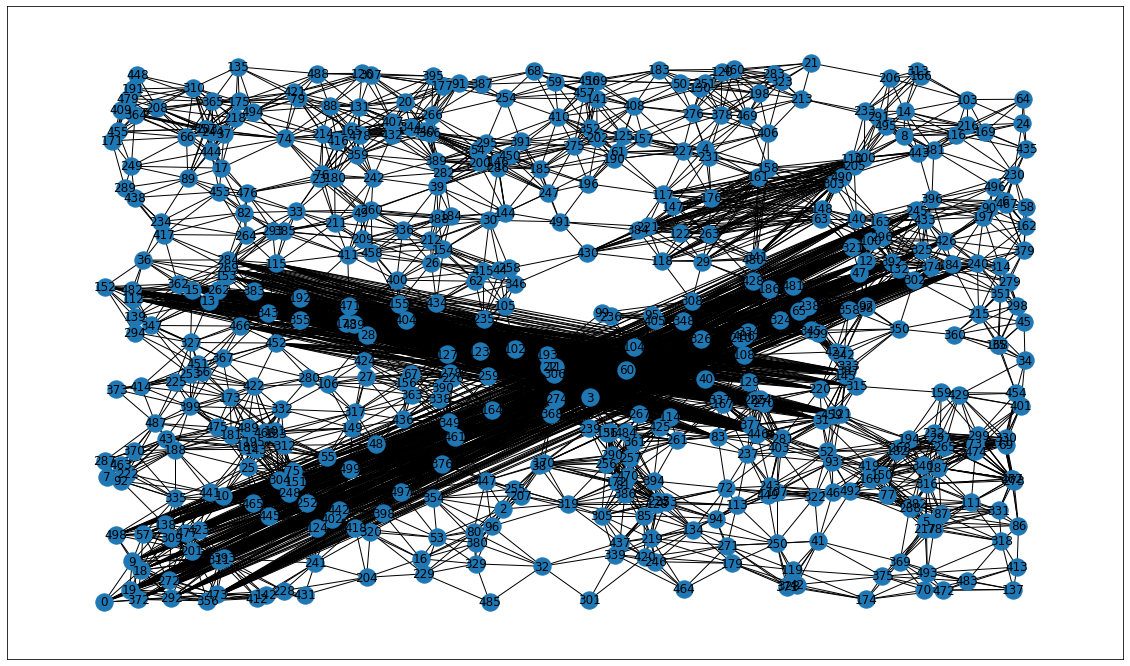

In [73]:
nx.draw_networkx(Wireless_network, pos, with_labels = True)
mpl.rcParams['figure.figsize'] = (20,12)

In [72]:
# Finding Global Clustering Coefficient
clusCoeff = 0
for m in range(len(coordinatesOfNodes)):
    lis1 = collections.deque(Wireless_network.neighbors(m))
    numNeig = len(lis1)
    edgeBwNeig = ei(lis1, adjLis)
    dy = numNeig*(numNeig - 1)
    clusCoeff += (edgeBwNeig/dy)
# Prints Global Clustering Coefficient
print(f'Global Clustering Coefficient : {clusCoeff}')

# Finding Average Clustering Coefficient
Avg_clusCoeff = clusCoeff/numberOfNodes
print(f'Average Clustering Coefficient : {Avg_clusCoeff}')

# Applying Dijkstra's Algorithm for Number of Hops
pathlis = []
adjMat = nx.adjacency_matrix(Wireless_network)
mat = adjMat.todense()
adjLis = mat.tolist()
for i in range(len(coordinatesOfNodes)):
    pathlis.append(dijkstra(i,adjLis))

# Calculating Average Path Length
total_sum = 0
for i in range(len(coordinatesOfNodes)):
  curr_sum = sum(pathlis[i])
  total_sum += curr_sum
Avg_path_len = total_sum/(499*500)
print(f'Average Path Length : {Avg_path_len}')

df = pd.DataFrame(data=pathlis)
print(df)

Global Clustering Coefficient : 275.4049924180332
Average Clustering Coefficient : 0.5508099848360664
Average Path Length : 5.231551102204409
     0    1    2    3    4    5    6    7    8    9    ...  490  491  492  \
0      0    6    6    6    4    7    2    4    3    1  ...    2    4    6   
1      6    0    8    6    3    8    7    8    5    6  ...    4    2    7   
2      6    8    0    3    8    6    6    6    7    5  ...    6    8    5   
3      6    6    3    0    6    5    7    7    6    6  ...    5    5    4   
4      4    3    8    6    0    9    5    6    3    4  ...    2    3    8   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
495    3    5    7    6    3    9    3    5    1    3  ...    2    3    8   
496    2    6    6    7    4    8    1    4    2    2  ...    3    4    8   
497    5    7    2    4    7    7    5    4    6    4  ...    5    7    6   
498    2    6    5    6    4    7    2    2    3    1  ...    2    4    6   
499    5   